# 일반 예측
- 모델 선택
- 데이터 분할
- 데이터 학습
- 학습 모델 검증
- 모델 수정
- 예측

- 예측을 위해서 알아야 할 것
    - 예측이란?
    - ACF와 PACF 그래프
    - AR
    - 기술 통계와 검증
    - ARIMA

## 데이터 분할과 학습

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [87]:
df = pd.read_csv('../data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [88]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend='mul', 
                                    seasonal='mul', 
                                    seasonal_periods=12).fit()

c:\Users\sigma\works\practice-analysis\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [90]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')
test_predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, Name: HW Forecast, dtype: float64

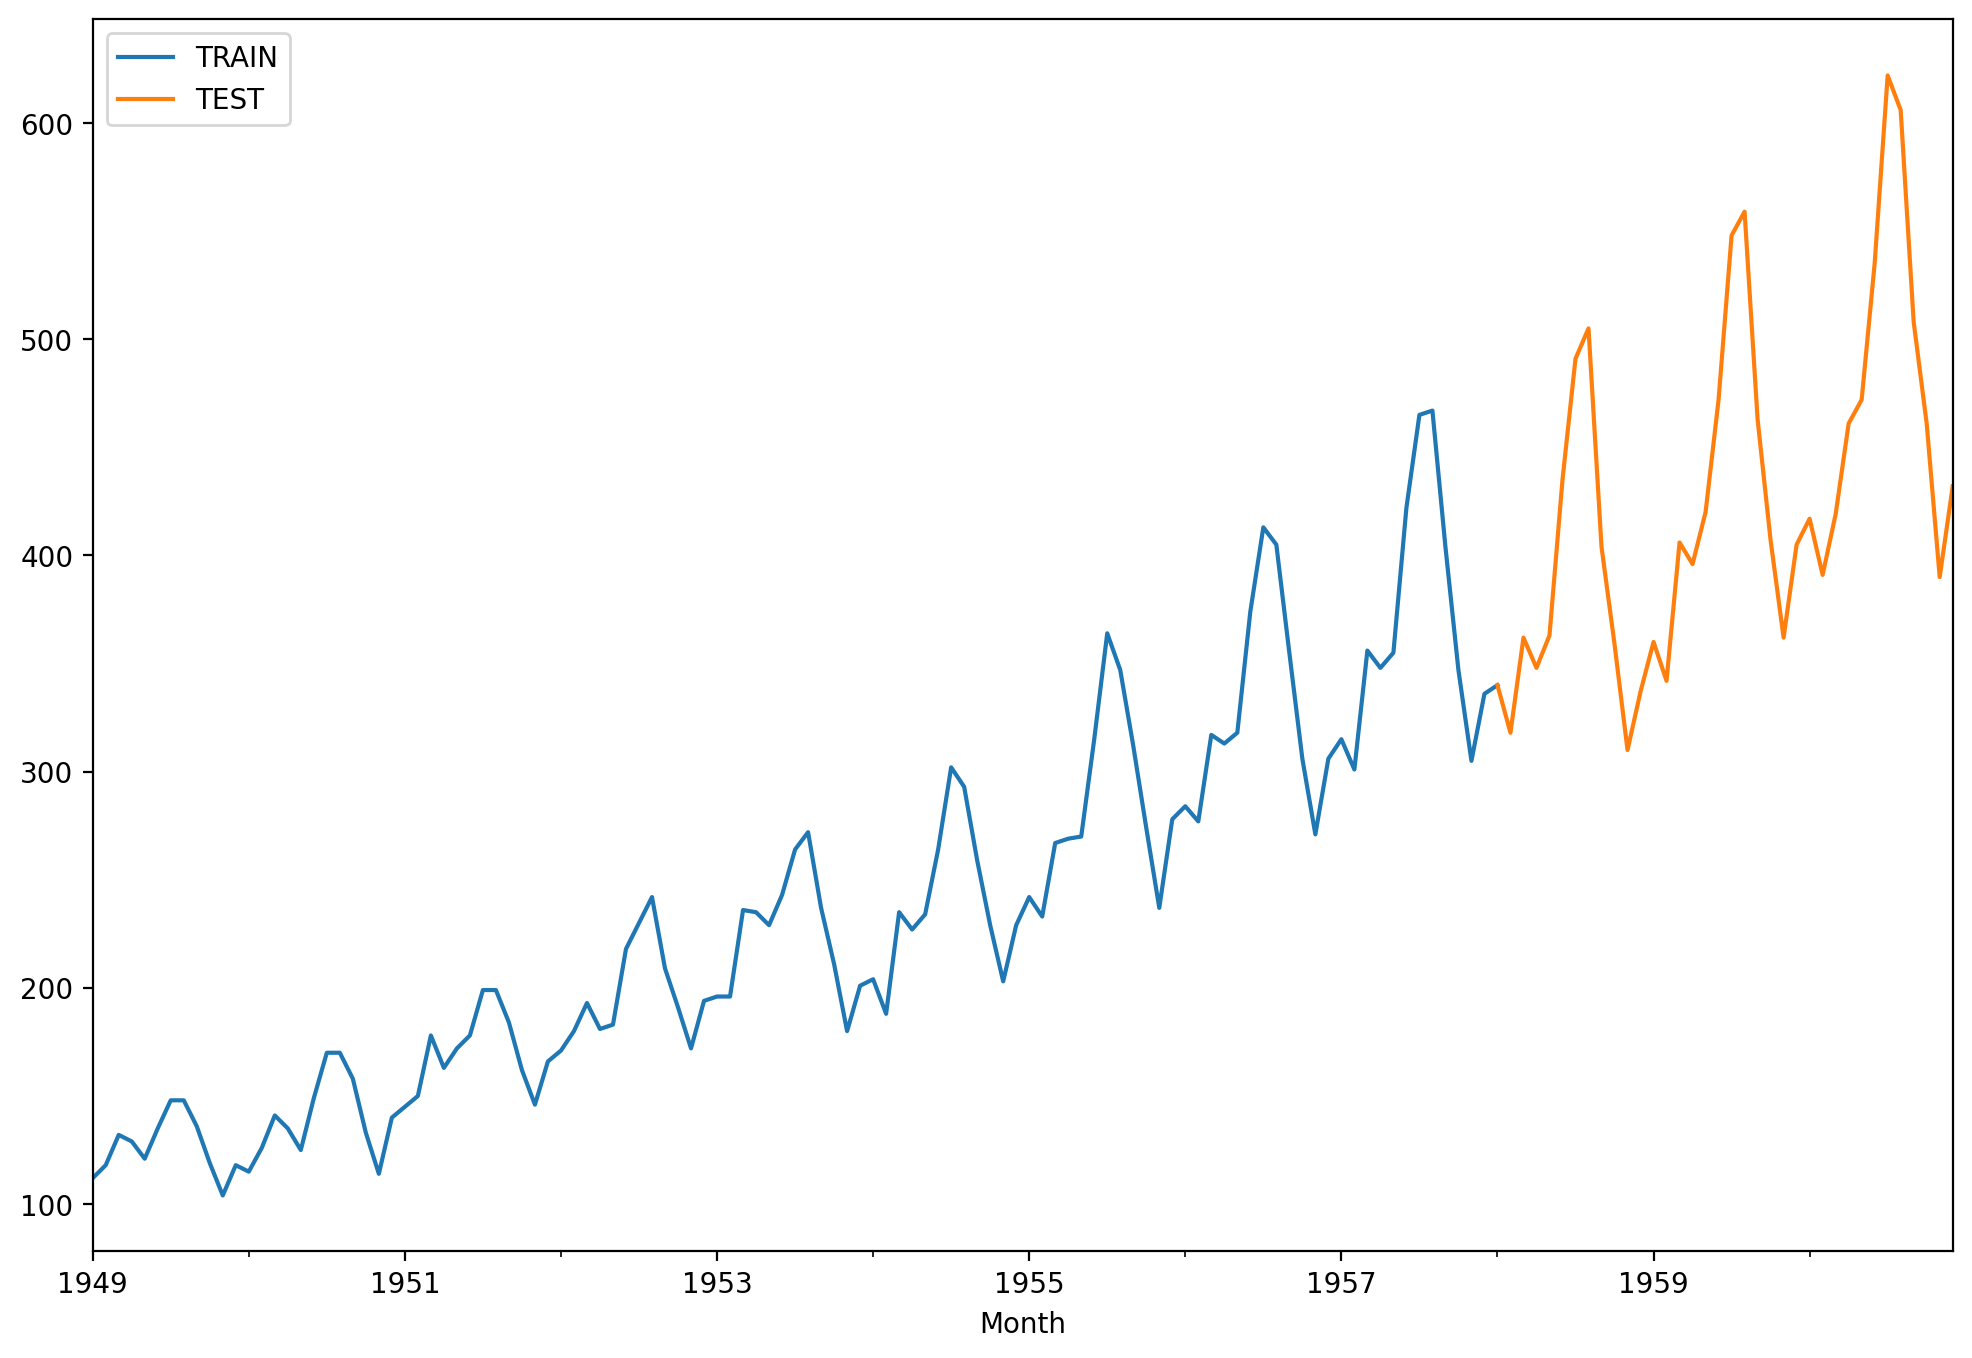

In [91]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

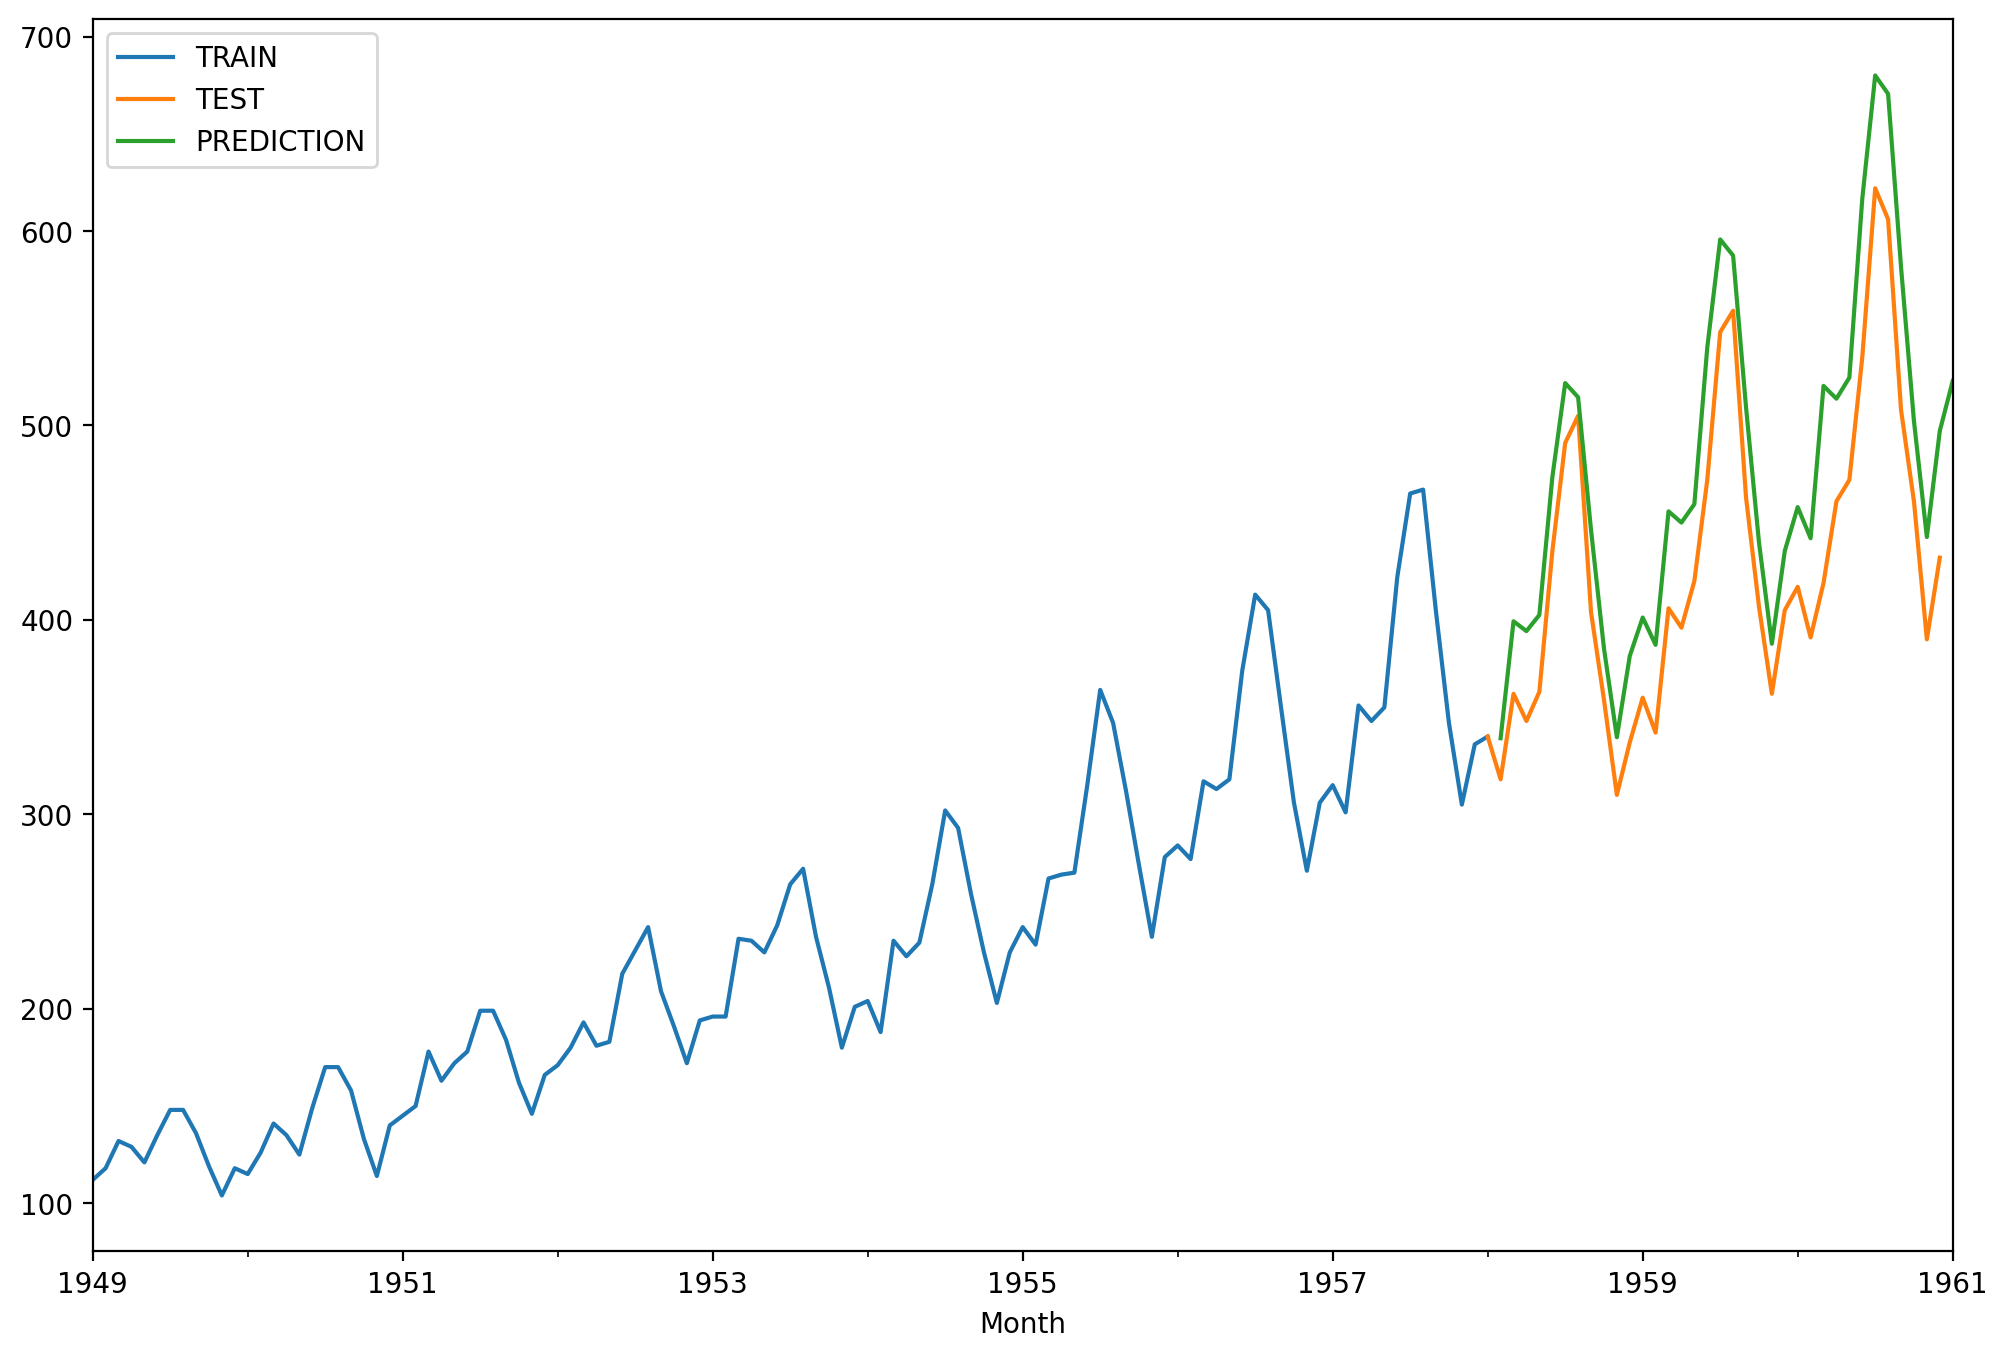

In [92]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

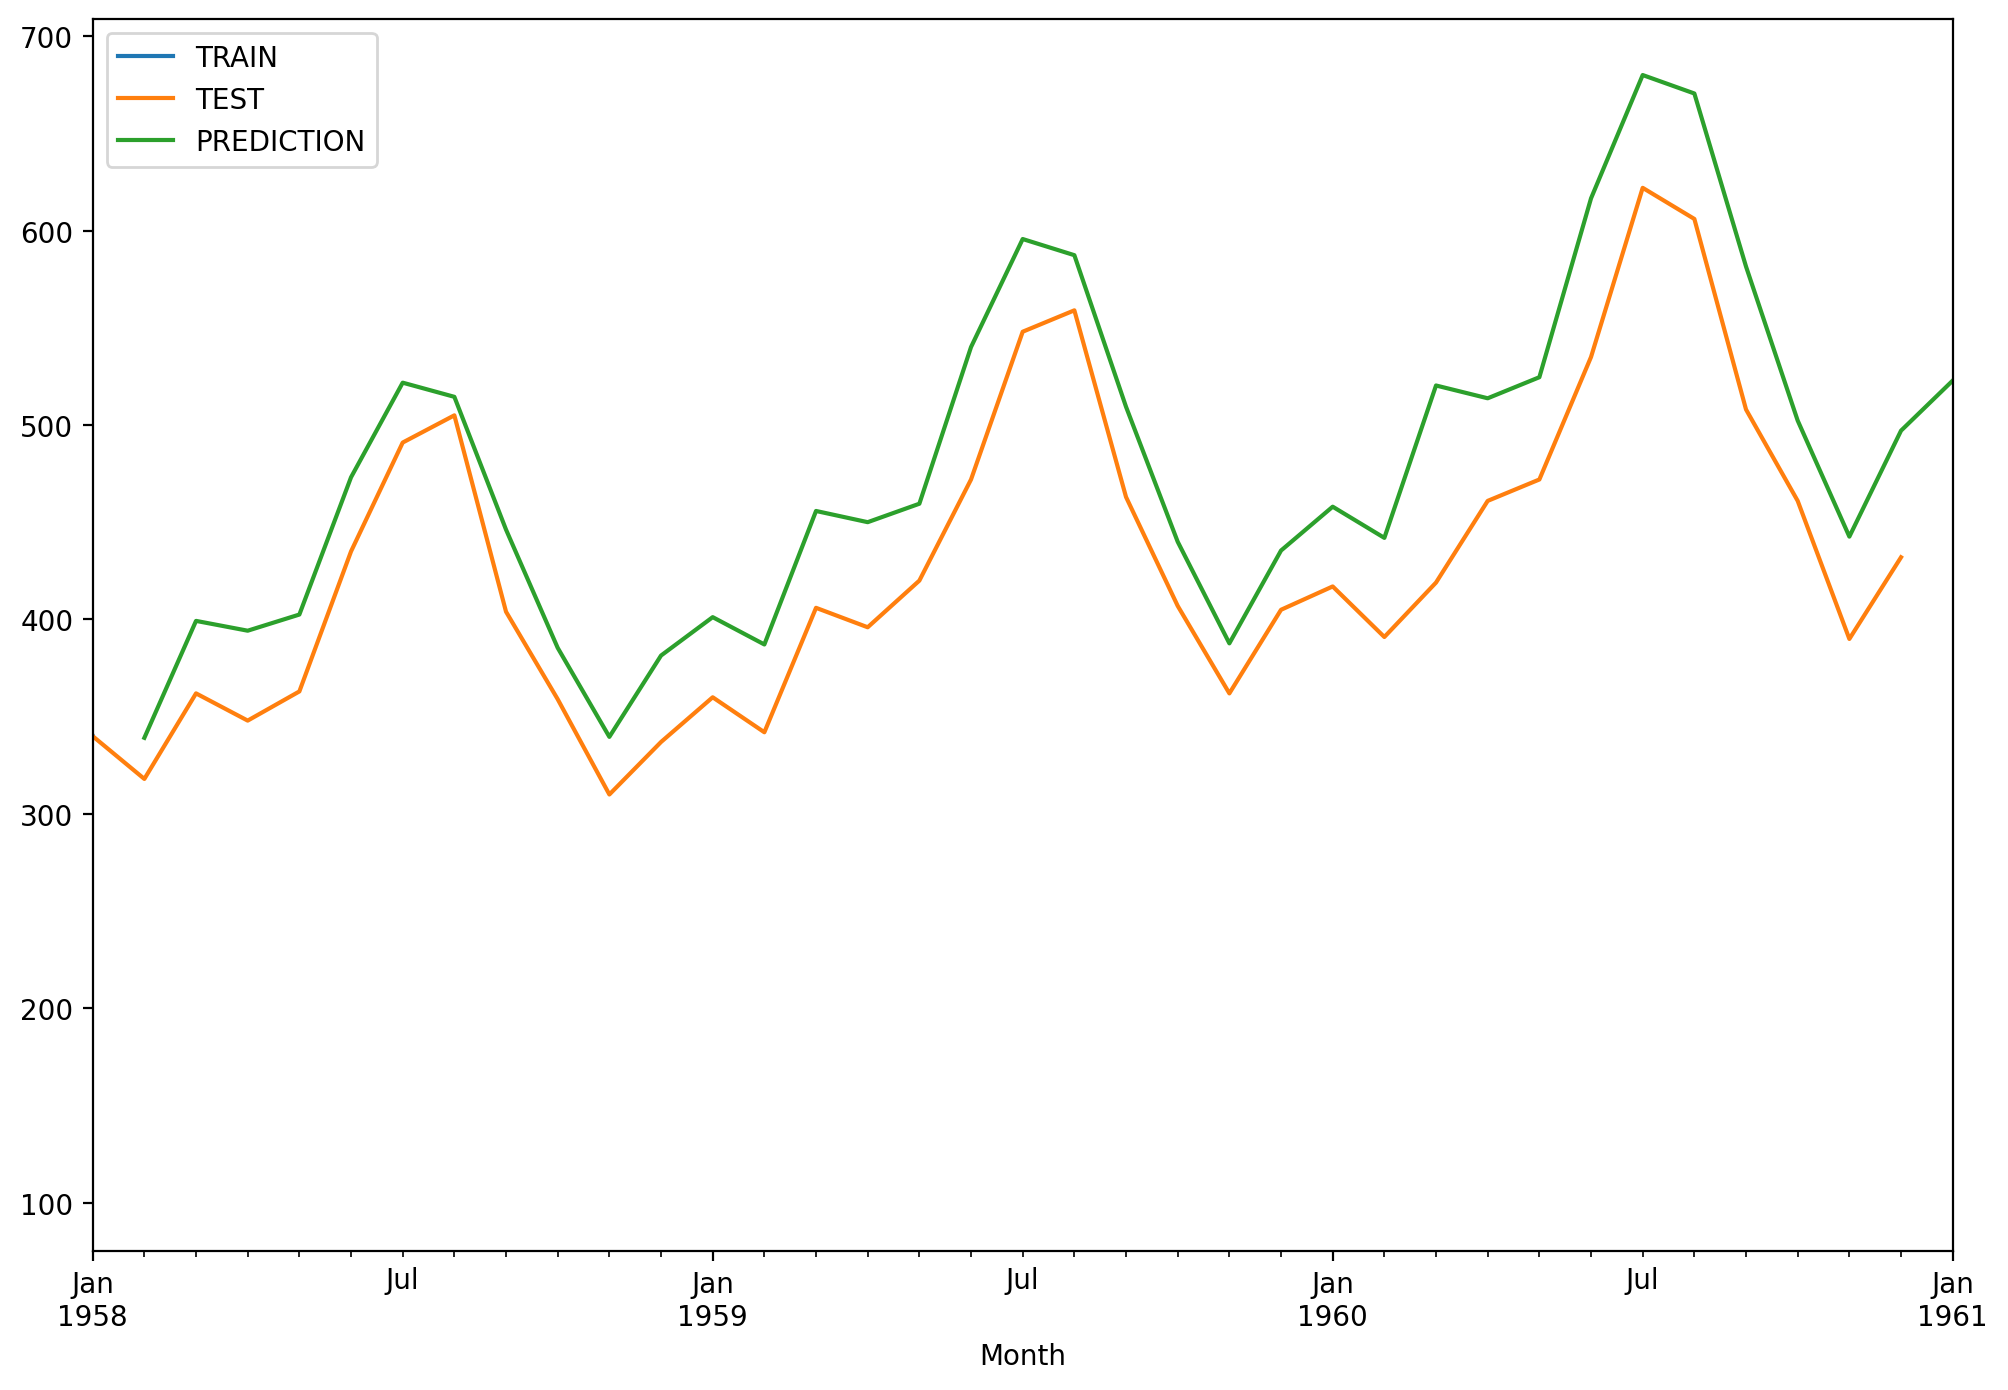

In [93]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## 검증

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [95]:
mean_absolute_error(test_data,test_predictions)

63.03104082299123

In [96]:
mean_squared_error(test_data,test_predictions)

5614.236501157957

In [97]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92820898138402

In [98]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [99]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\Users\sigma\works\practice-analysis\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [100]:
forecast_predictions = final_model.forecast(36)

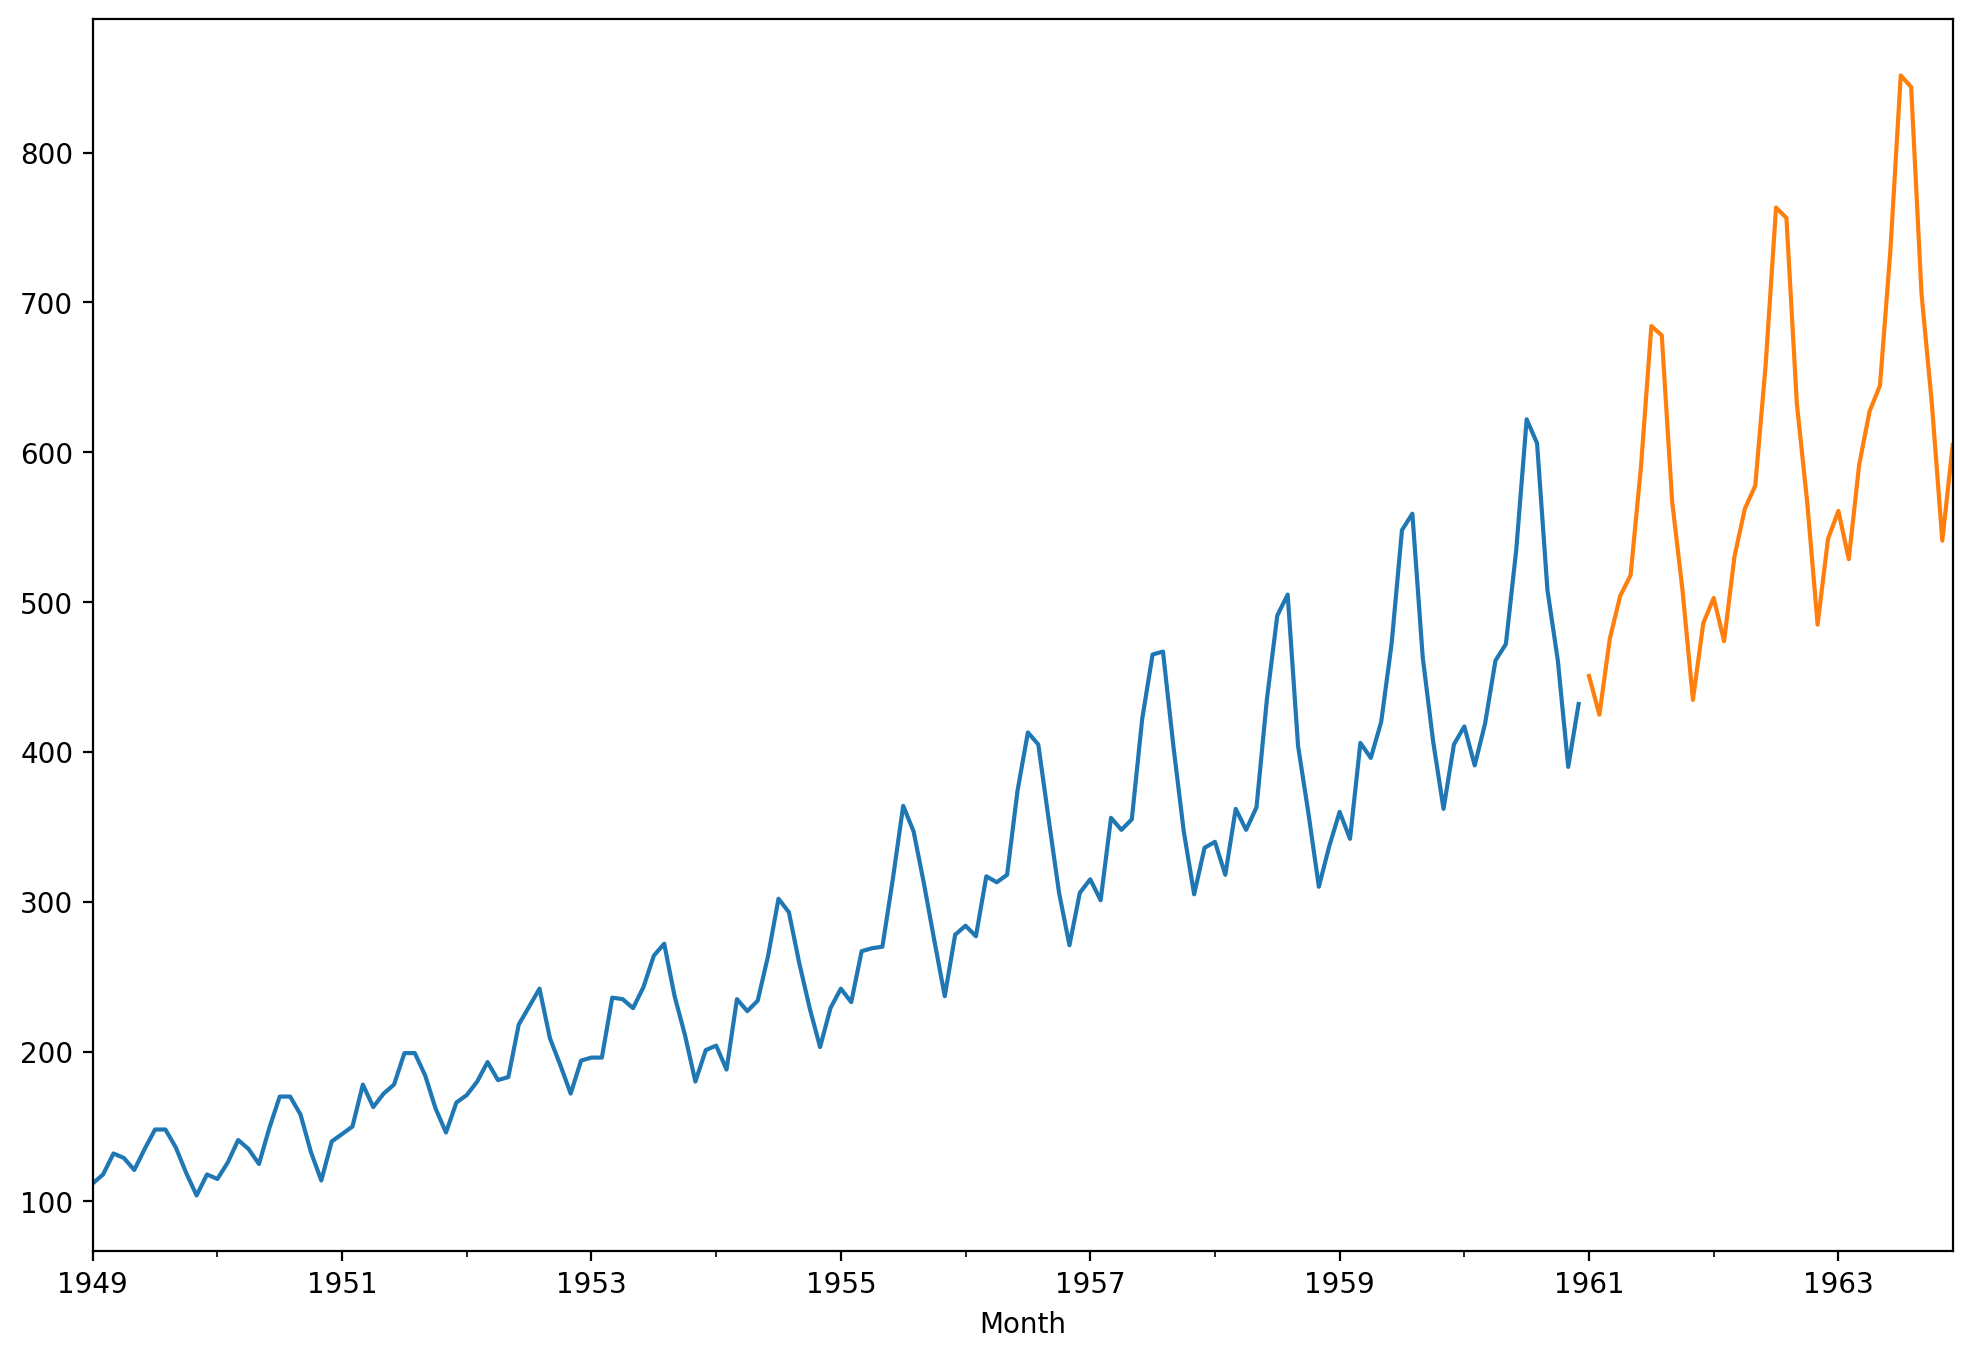

In [101]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

In [102]:
df2 = pd.read_csv('../data/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


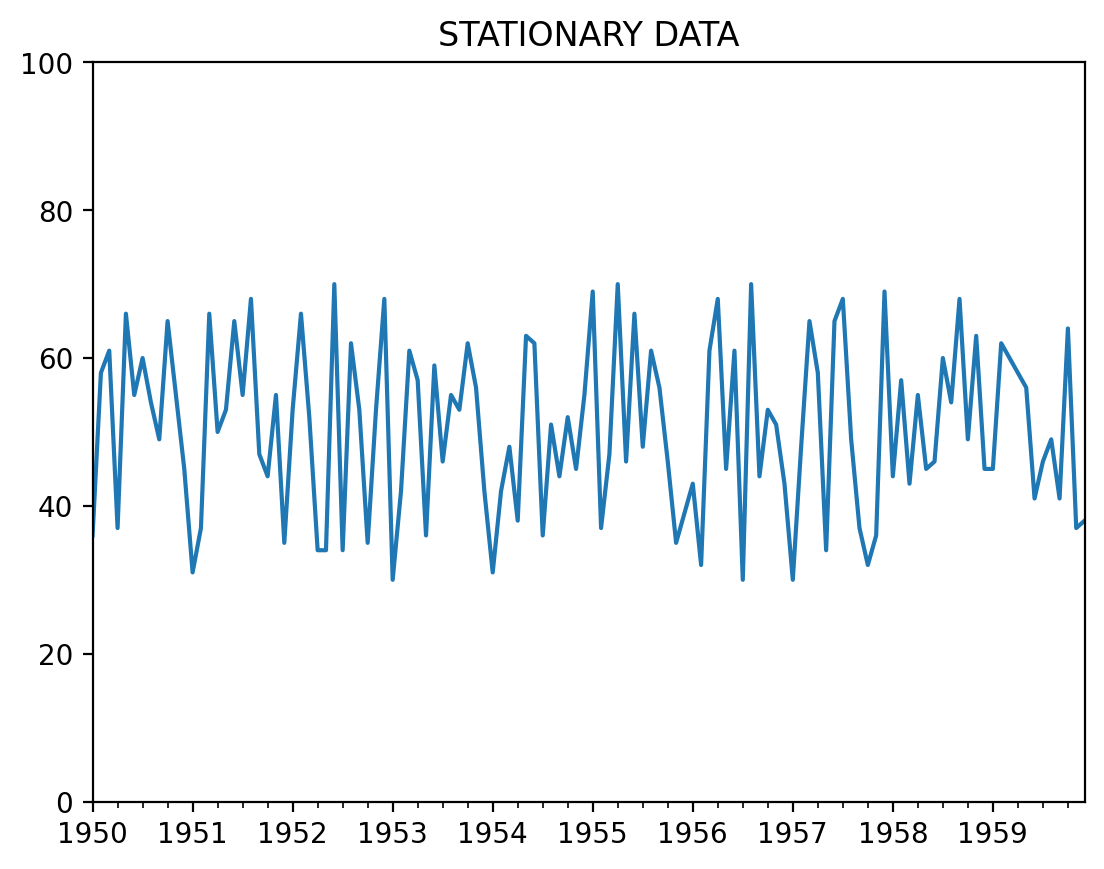

In [103]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

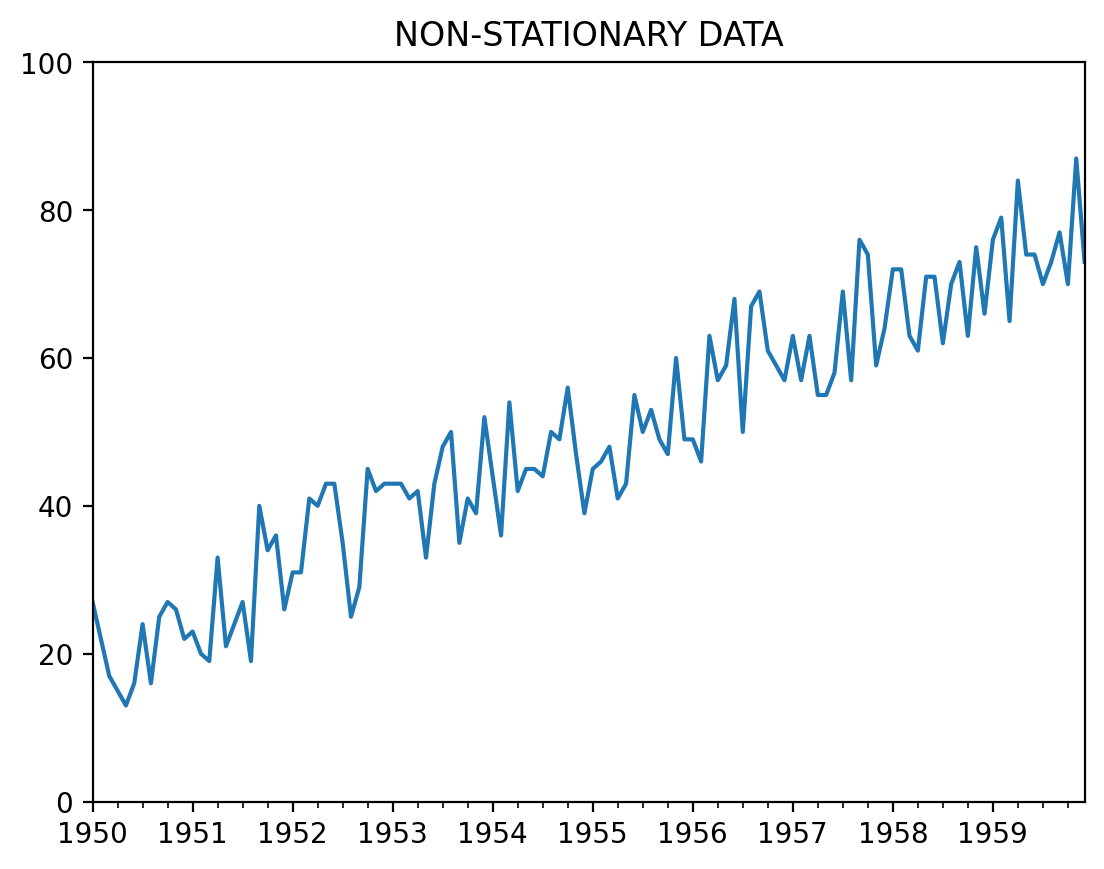

In [104]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

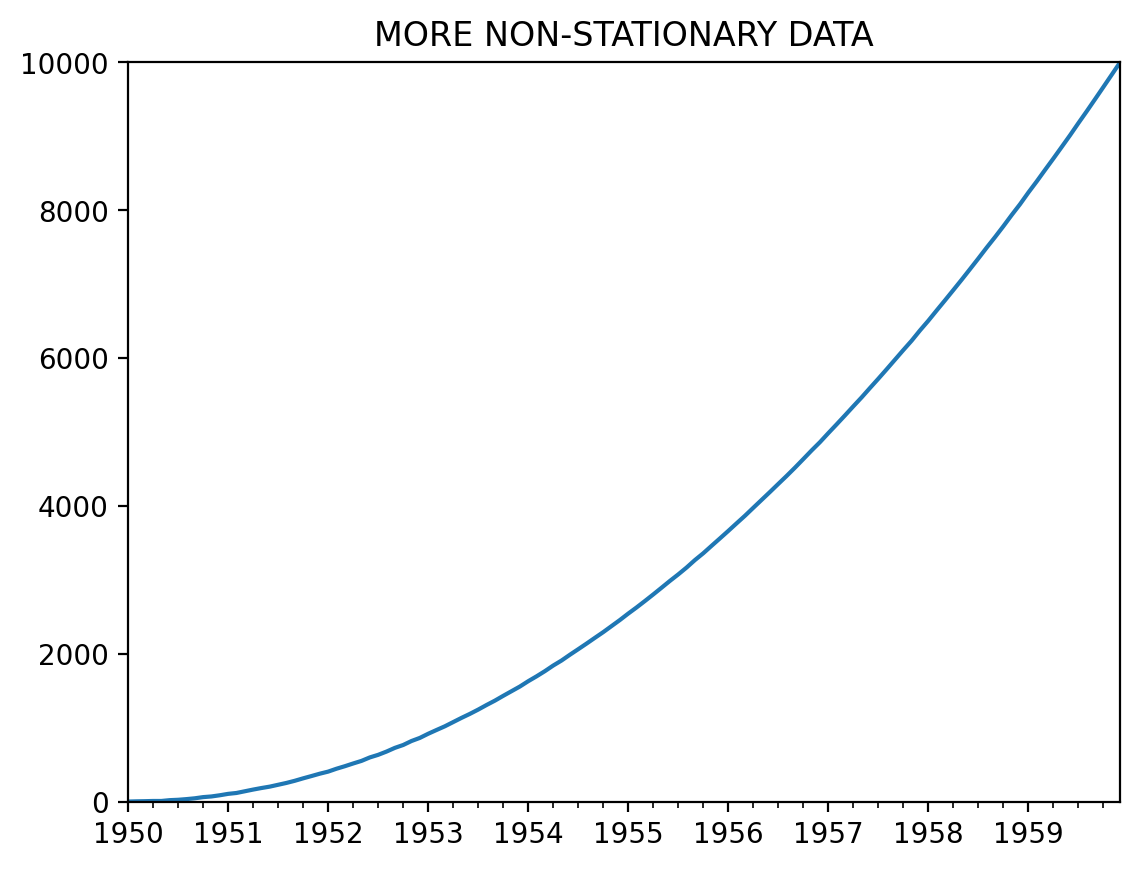

In [105]:
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [106]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)
df2[['b','d1b']].head()

,b,d1b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


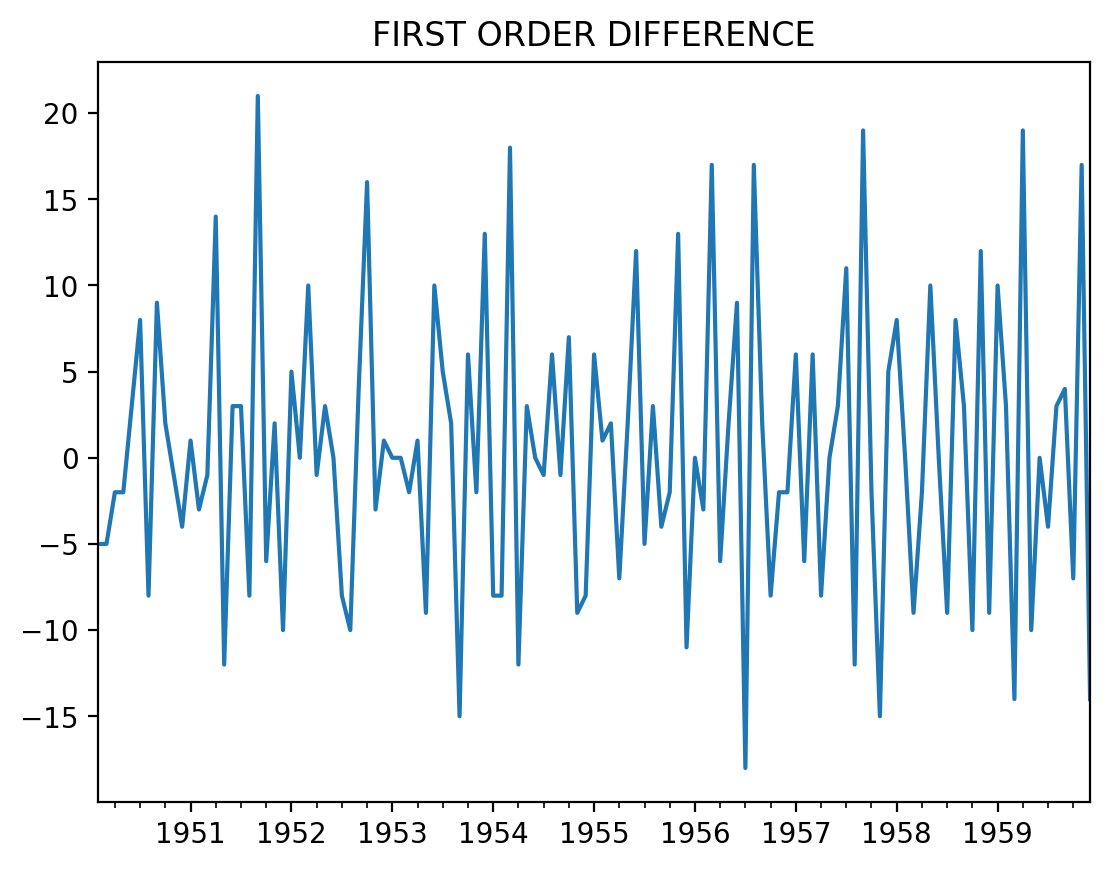

In [107]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

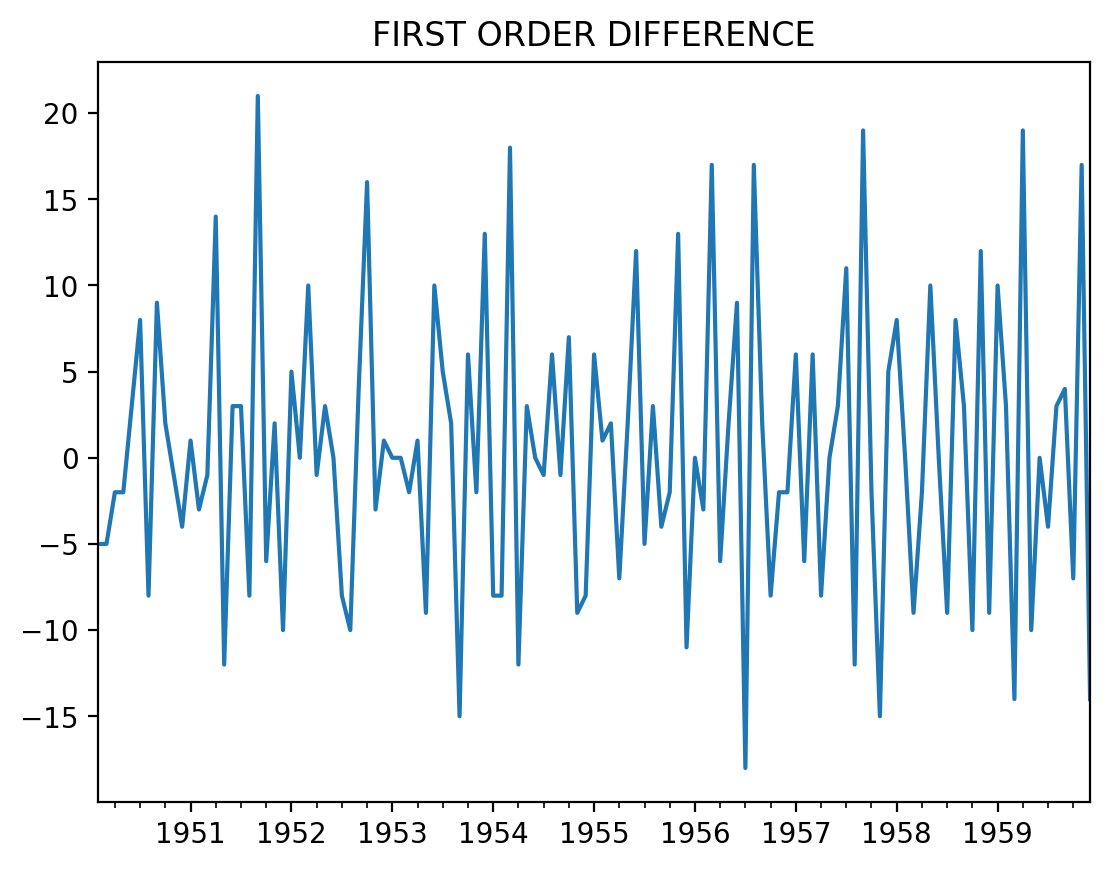

In [108]:
df2['d1b'] = df2['b'].diff()
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [109]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [110]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [111]:
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


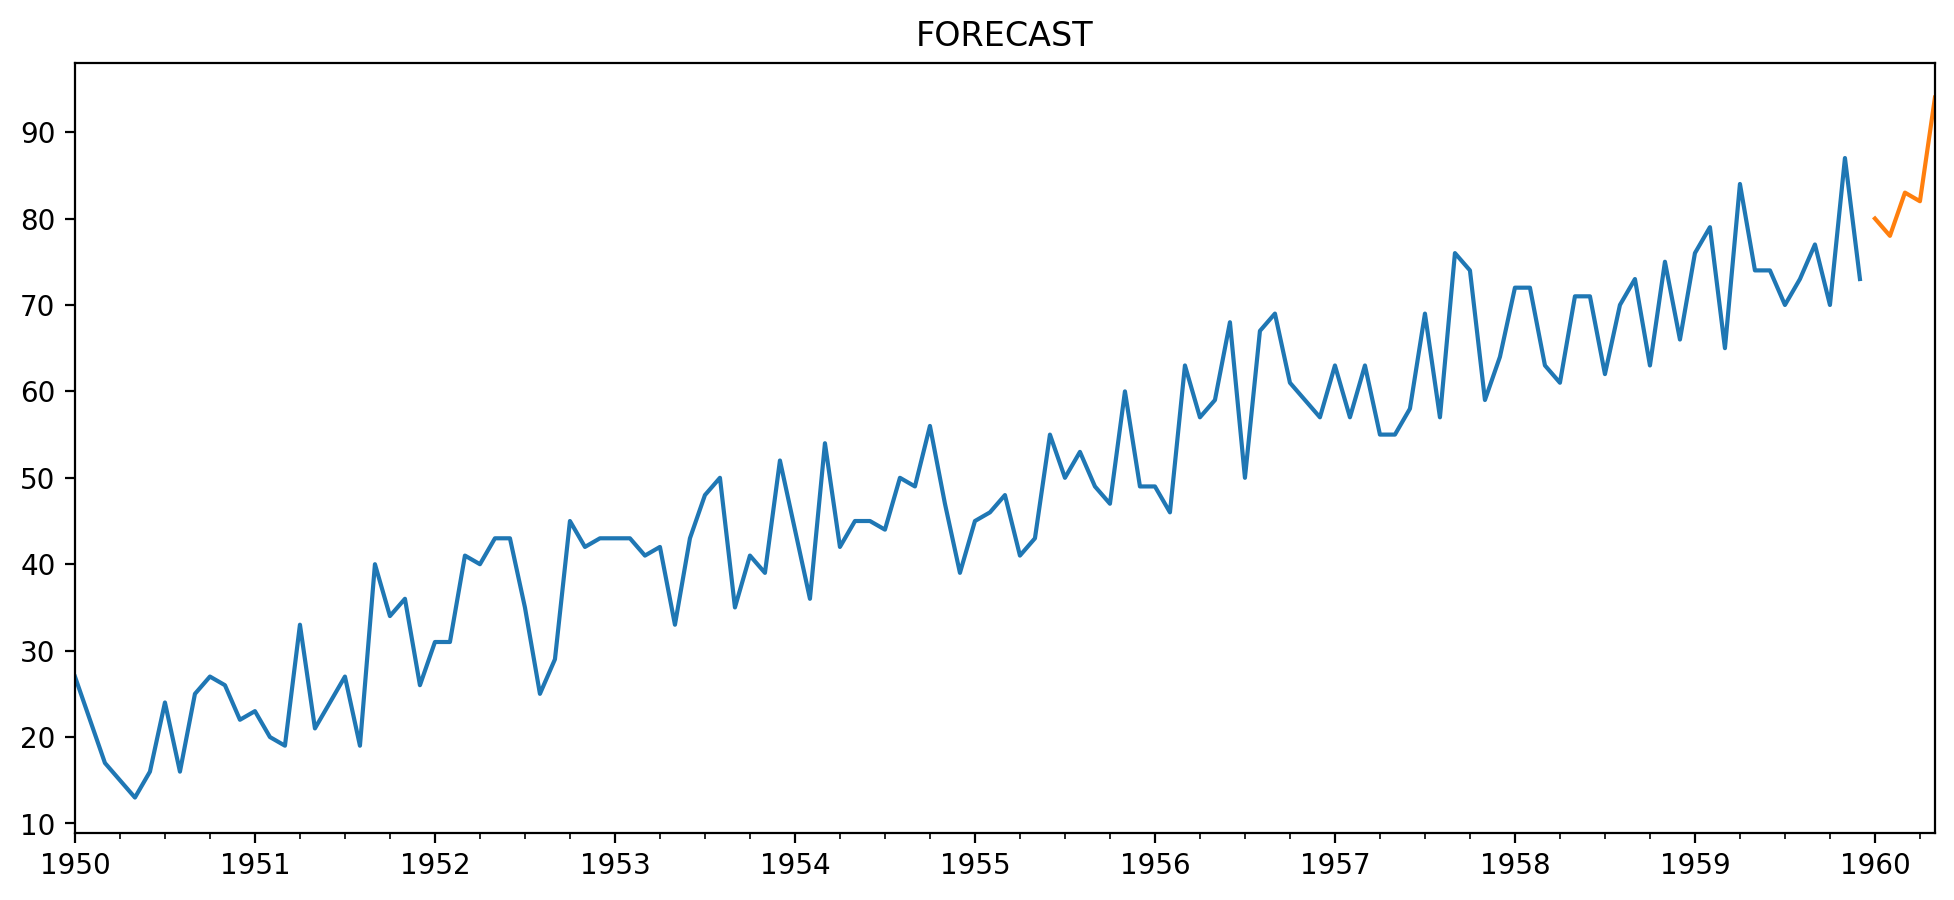

In [112]:
df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)
z['forecast'].plot();

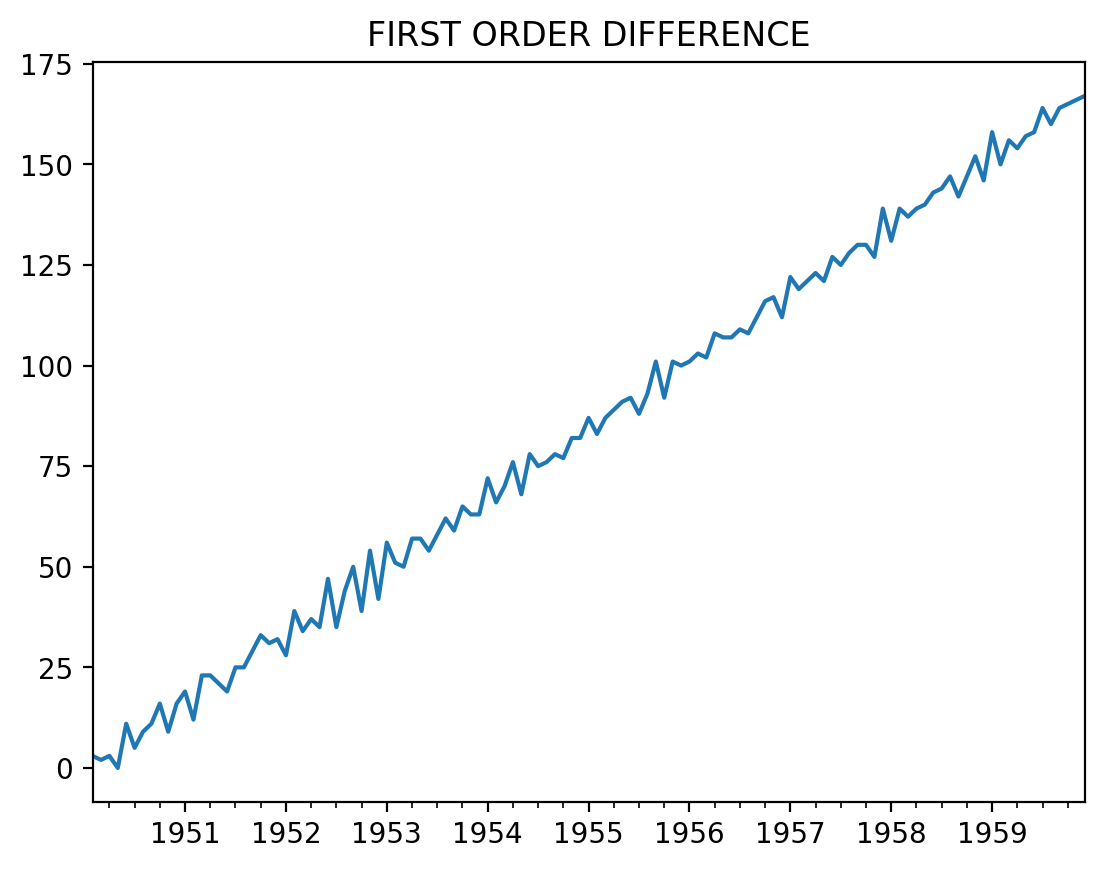

In [113]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()
df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [114]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()
df2[['c','d1c','d2c']].head()

,c,d1c,d2c
1950-01-01,0,NaN,NaN
1950-02-01,3,3.0,NaN
1950-03-01,5,2.0,-1.0
1950-04-01,8,3.0,1.0
1950-05-01,8,0.0,-3.0


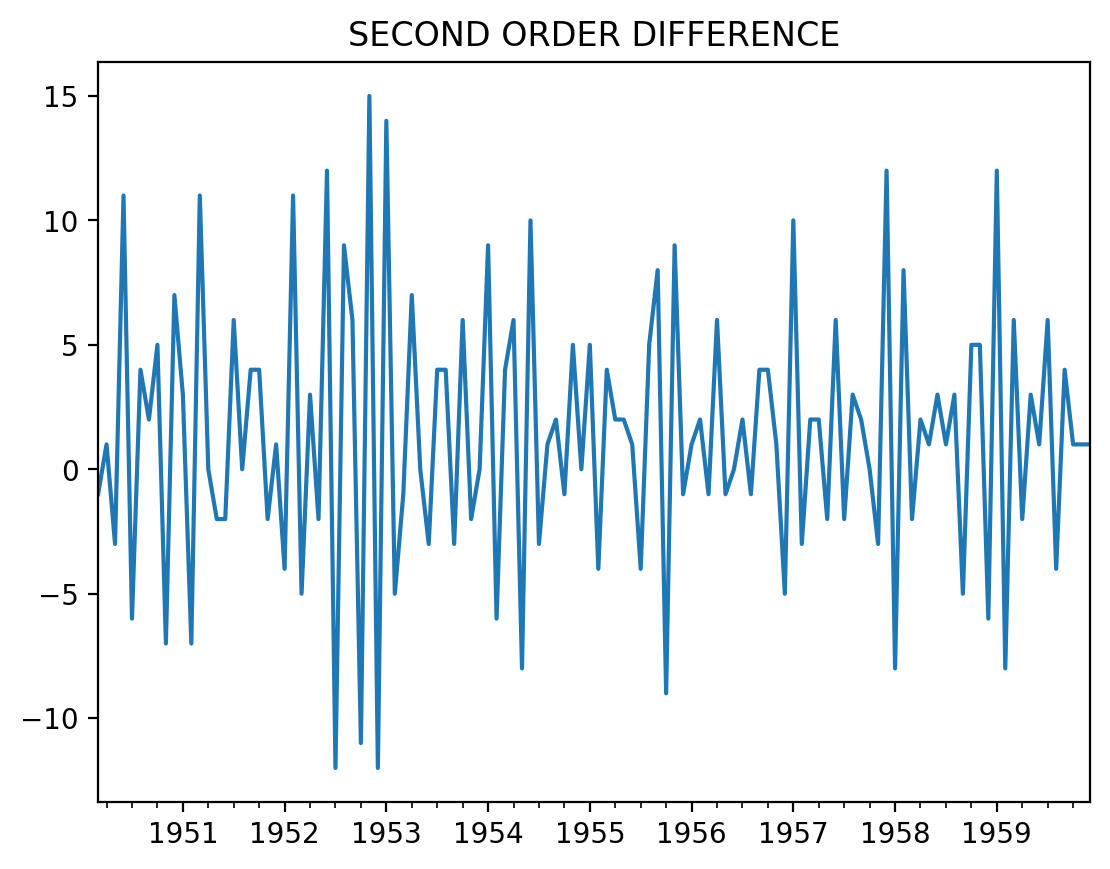

In [115]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [116]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [117]:
forecast = []
v2,v1 = df2['c'].iloc[-2:]
for i in z['Fcast']:
    new_val = i + 2*v1 - v2
    forecast.append(new_val)
    v2,v1 = v1,new_val
z['forecast']=forecast
z

,Fcast,forecast
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


In [118]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()
# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()
z[['Fcast','firstdiff','forecast']]

,Fcast,firstdiff,forecast
1960-01-01,7,174,10174
1960-02-01,-2,172,10346
1960-03-01,5,177,10523
1960-04-01,-1,176,10699
1960-05-01,12,188,10887


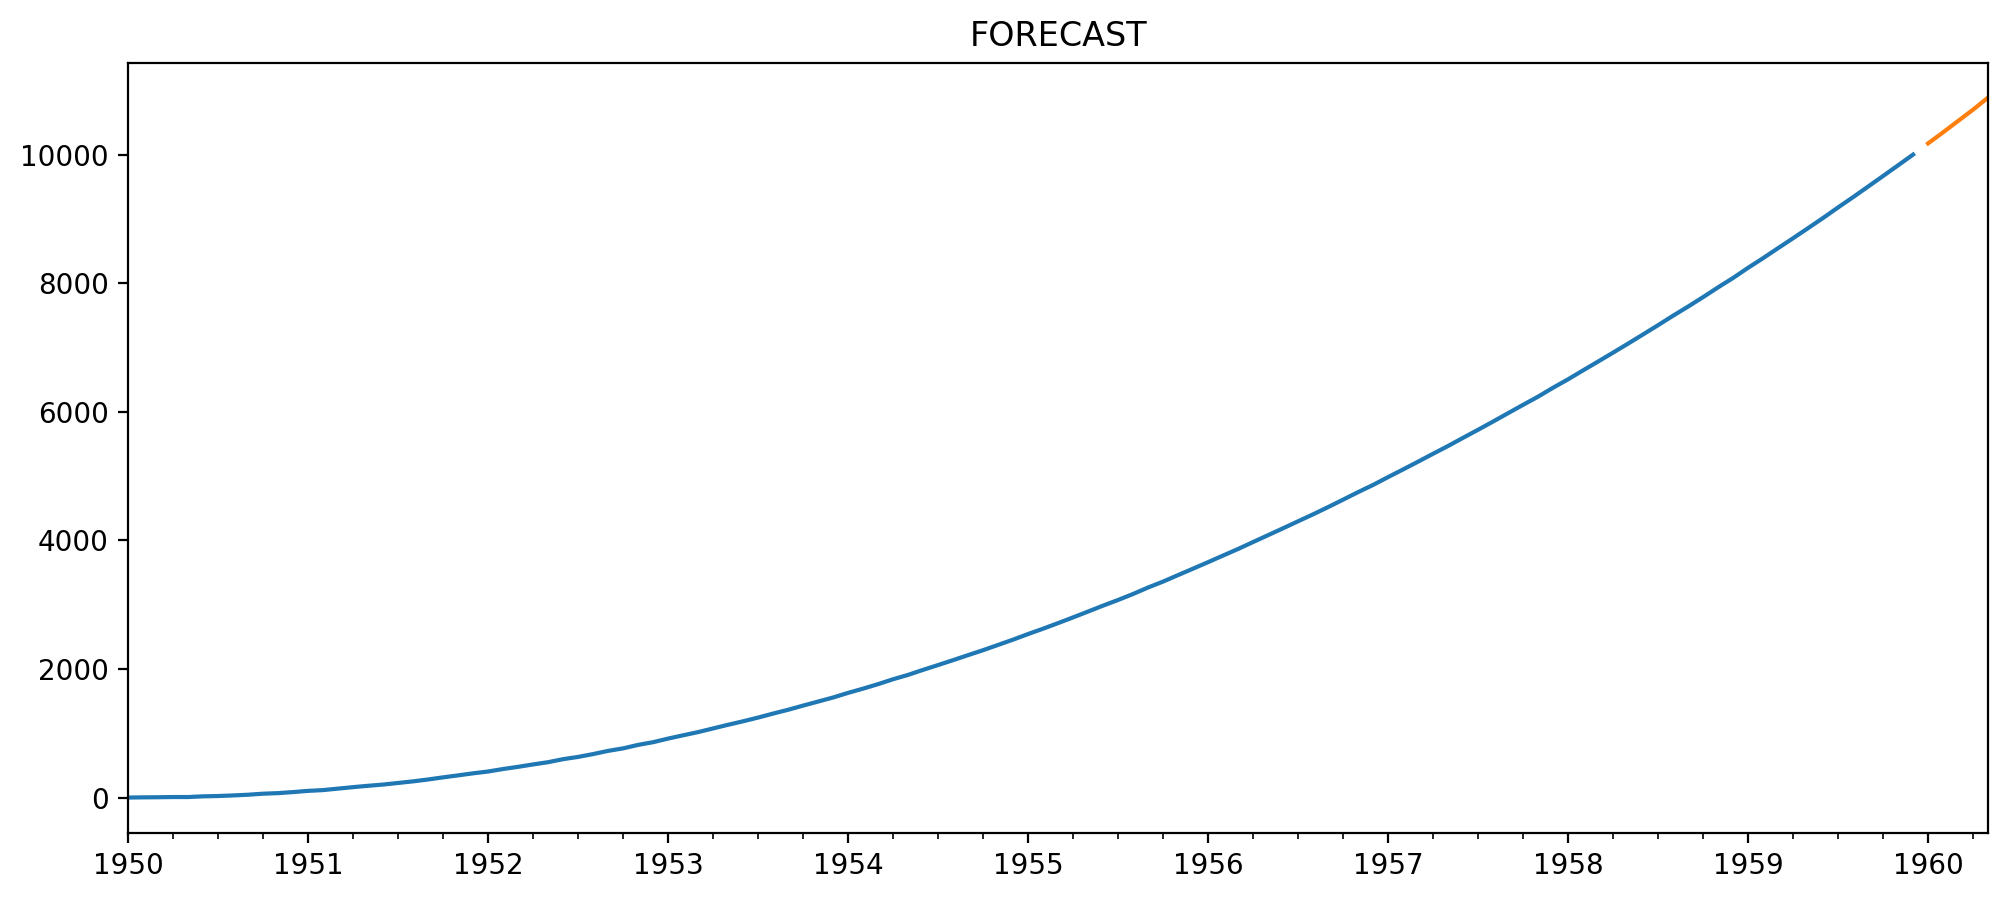

In [119]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)
z['forecast'].plot();

## ACF and PACF

In [120]:
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('../data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'
# Load a stationary dataset
df2 = pd.read_csv('../data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [121]:
# Import the models we'll be using in this section
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [122]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

In [124]:
arr2 = acovf(df['a'],adjusted=True)
arr2

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

In [125]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [129]:
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [131]:
arr5 = pacf_yw(df['a'],nlags=4,method='adjusted')
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [132]:
arr6 = pacf_ols(df['a'],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

### Plotting

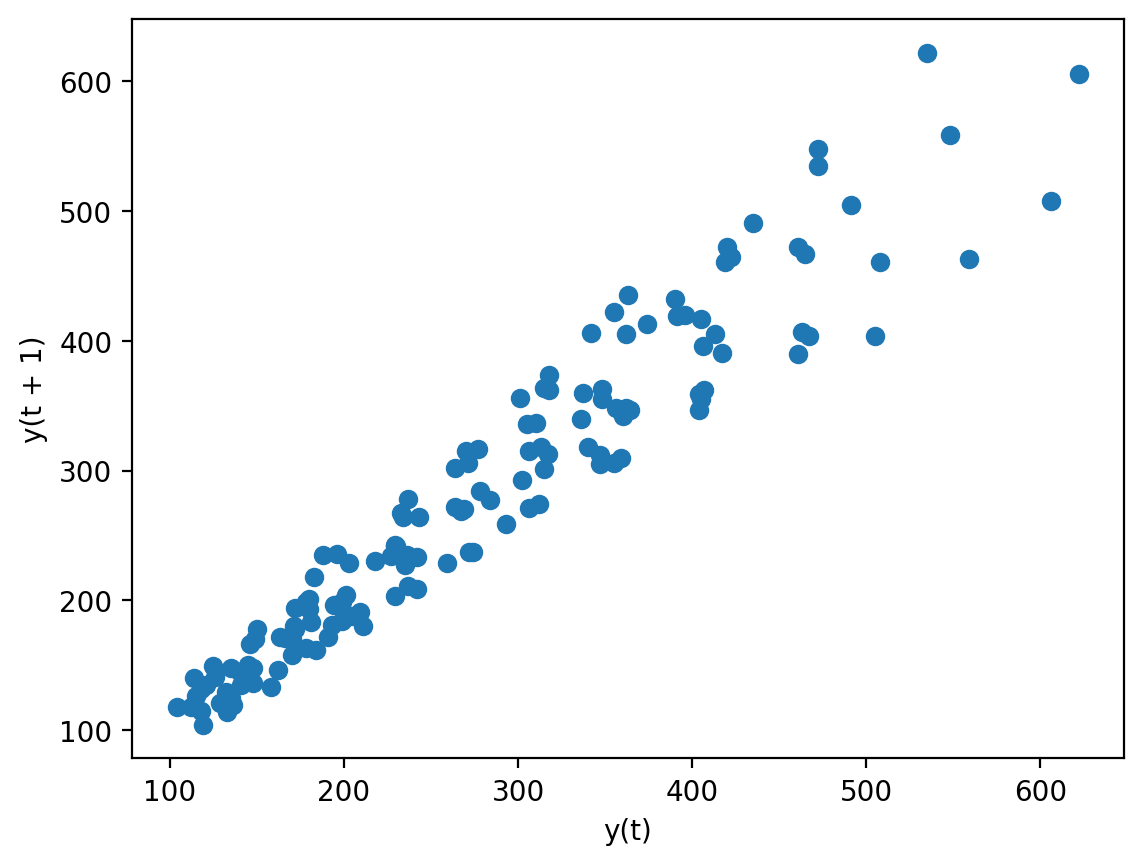

In [133]:
from pandas.plotting import lag_plot
lag_plot(df1['Thousands of Passengers']);

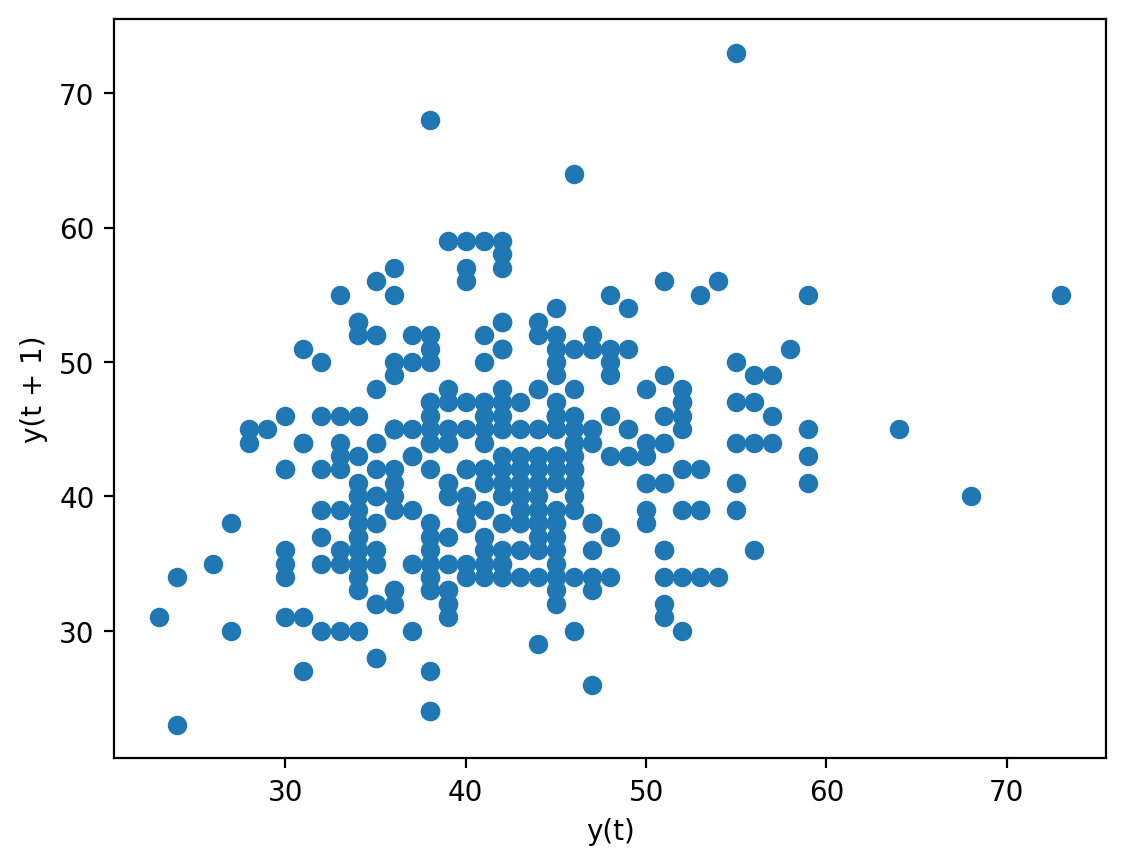

In [134]:
lag_plot(df2['Births']);

### ACF Plots

In [135]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [136]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

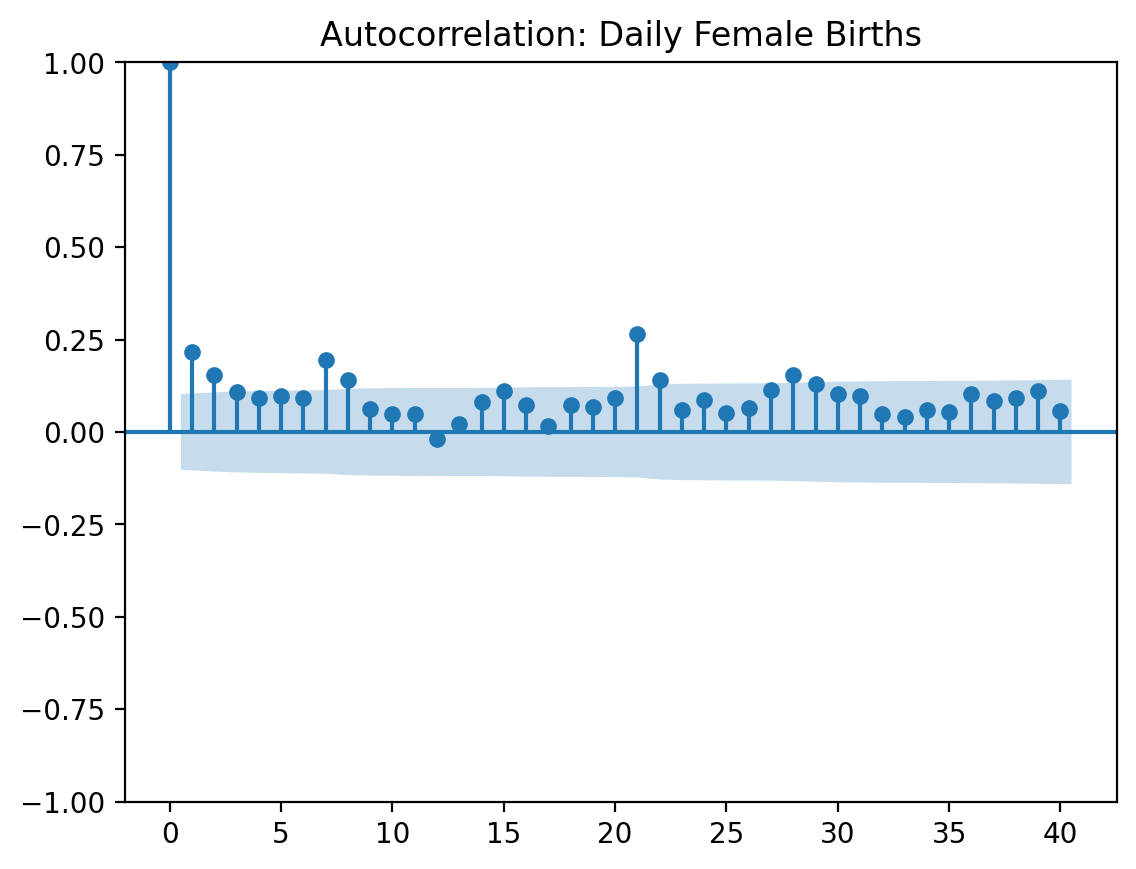

In [137]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

In [138]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

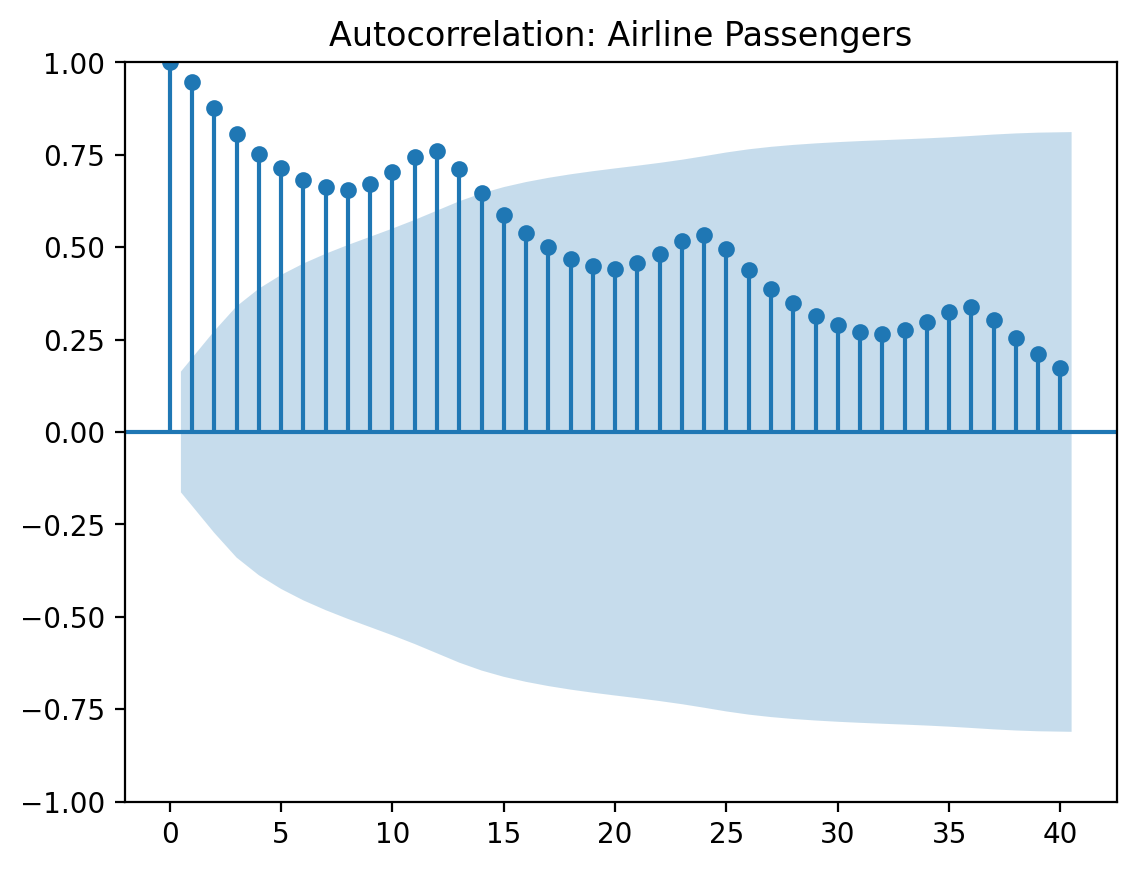

In [139]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

### PACF Plots

c:\Users\sigma\works\practice-analysis\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


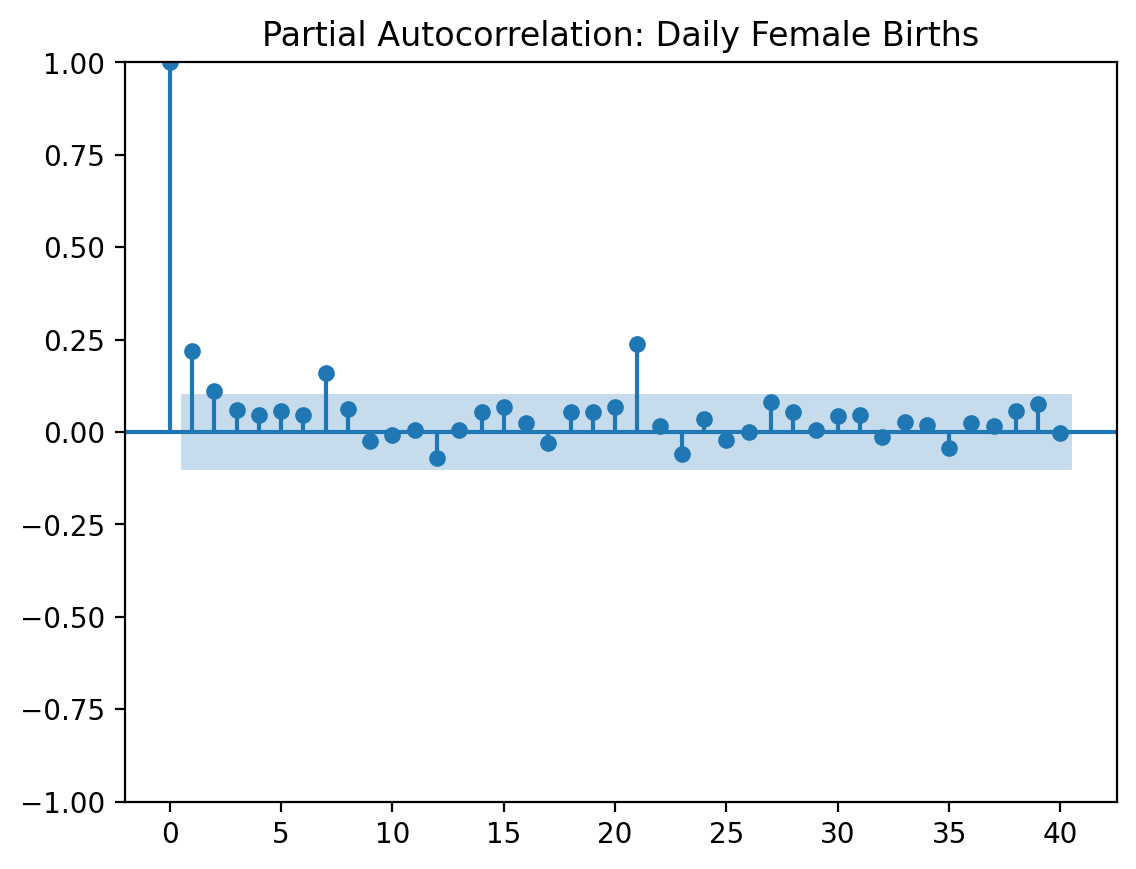

In [140]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);

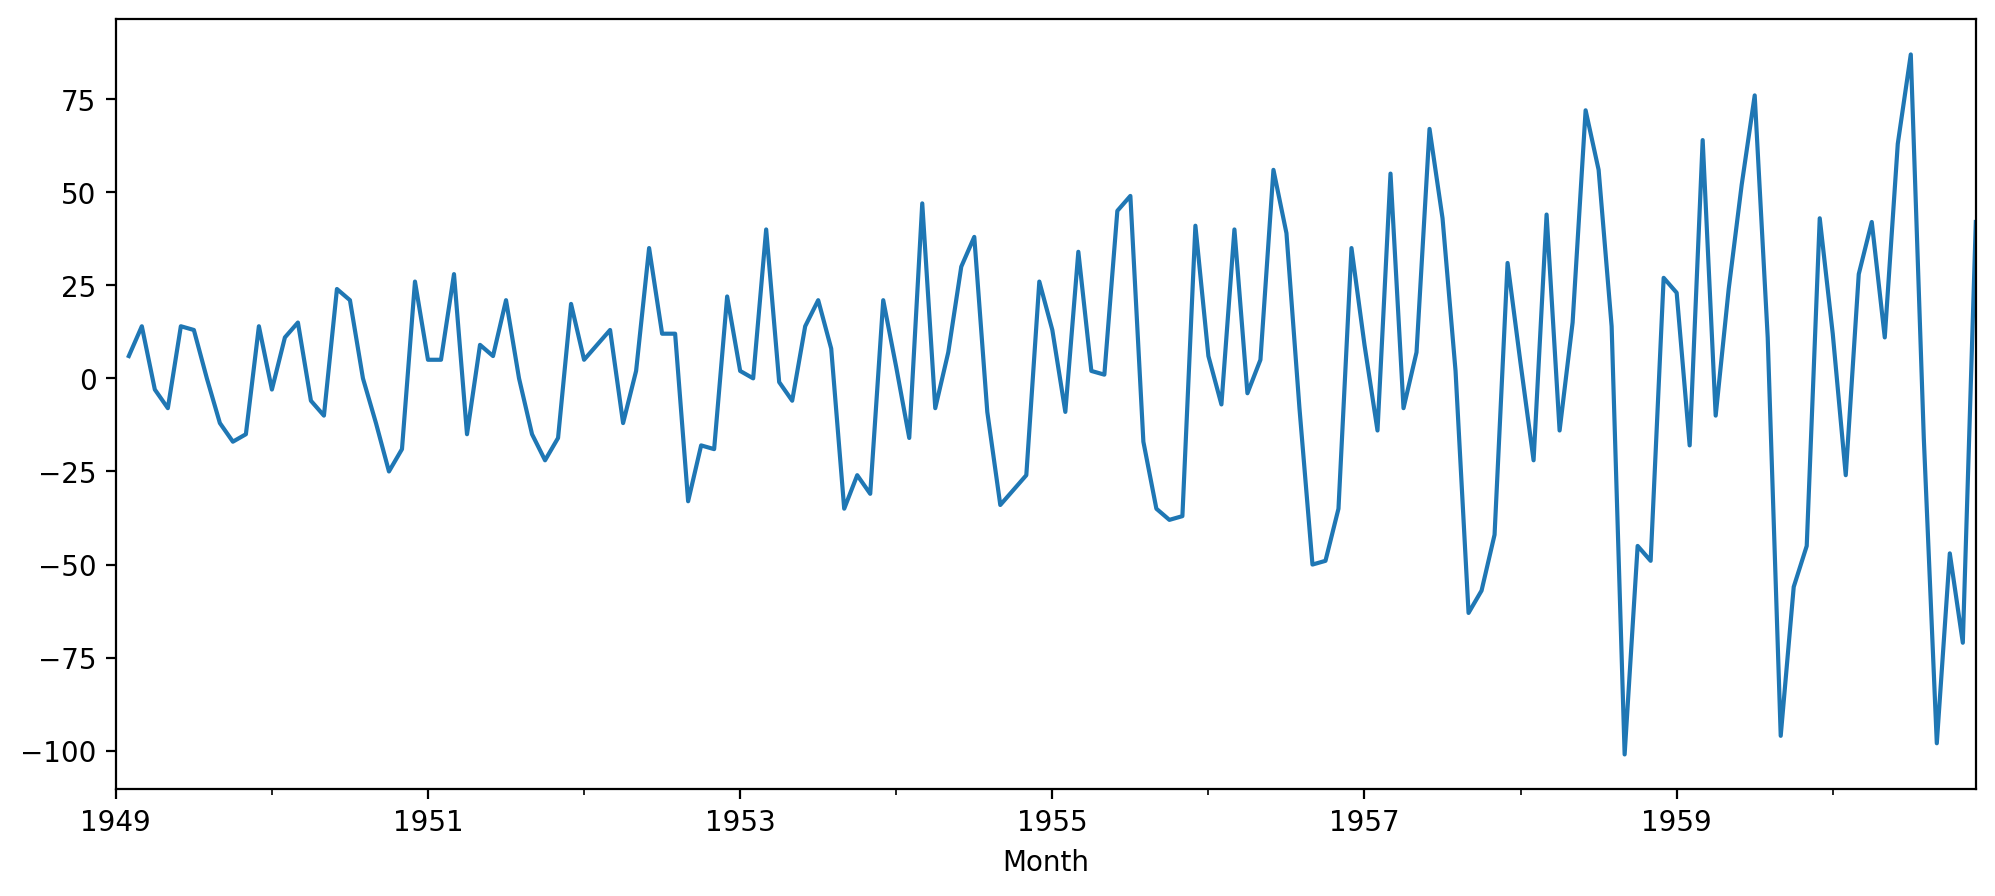

In [141]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5));

c:\Users\sigma\works\practice-analysis\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


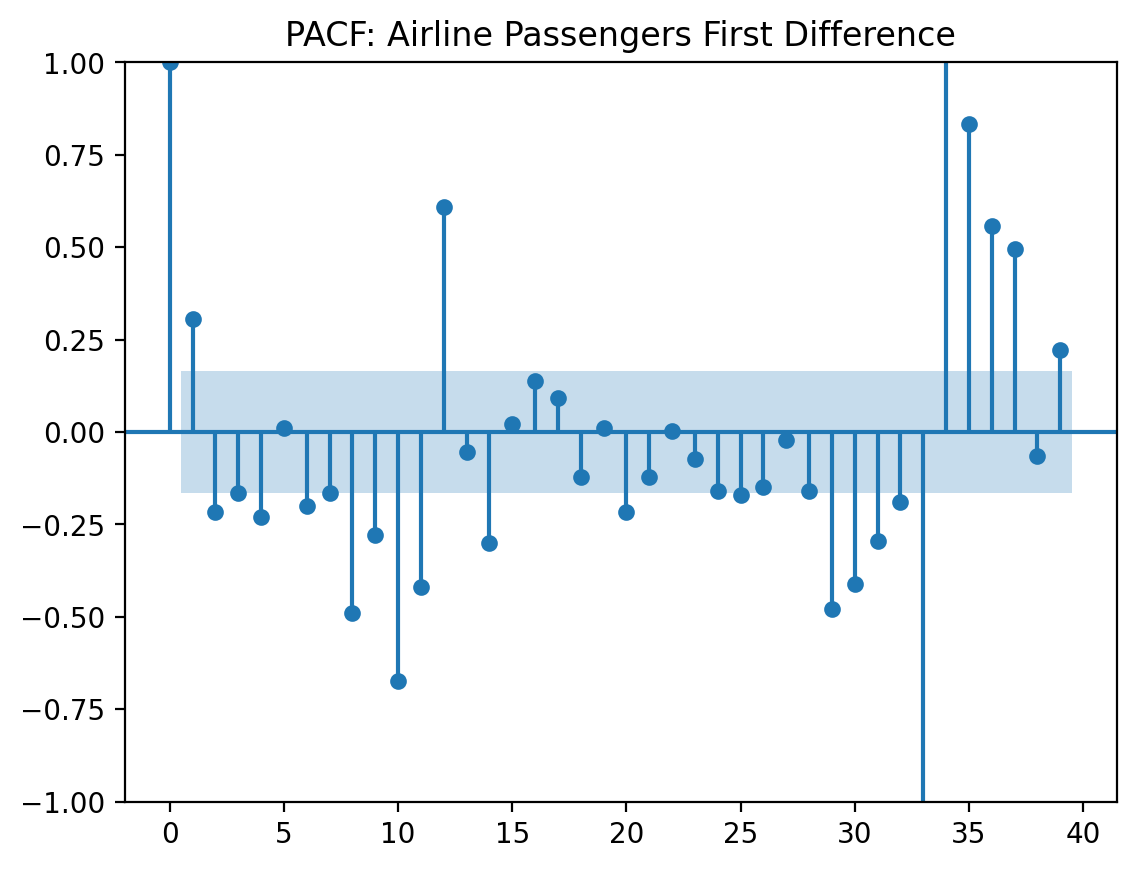

In [142]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

### Plot Resizing

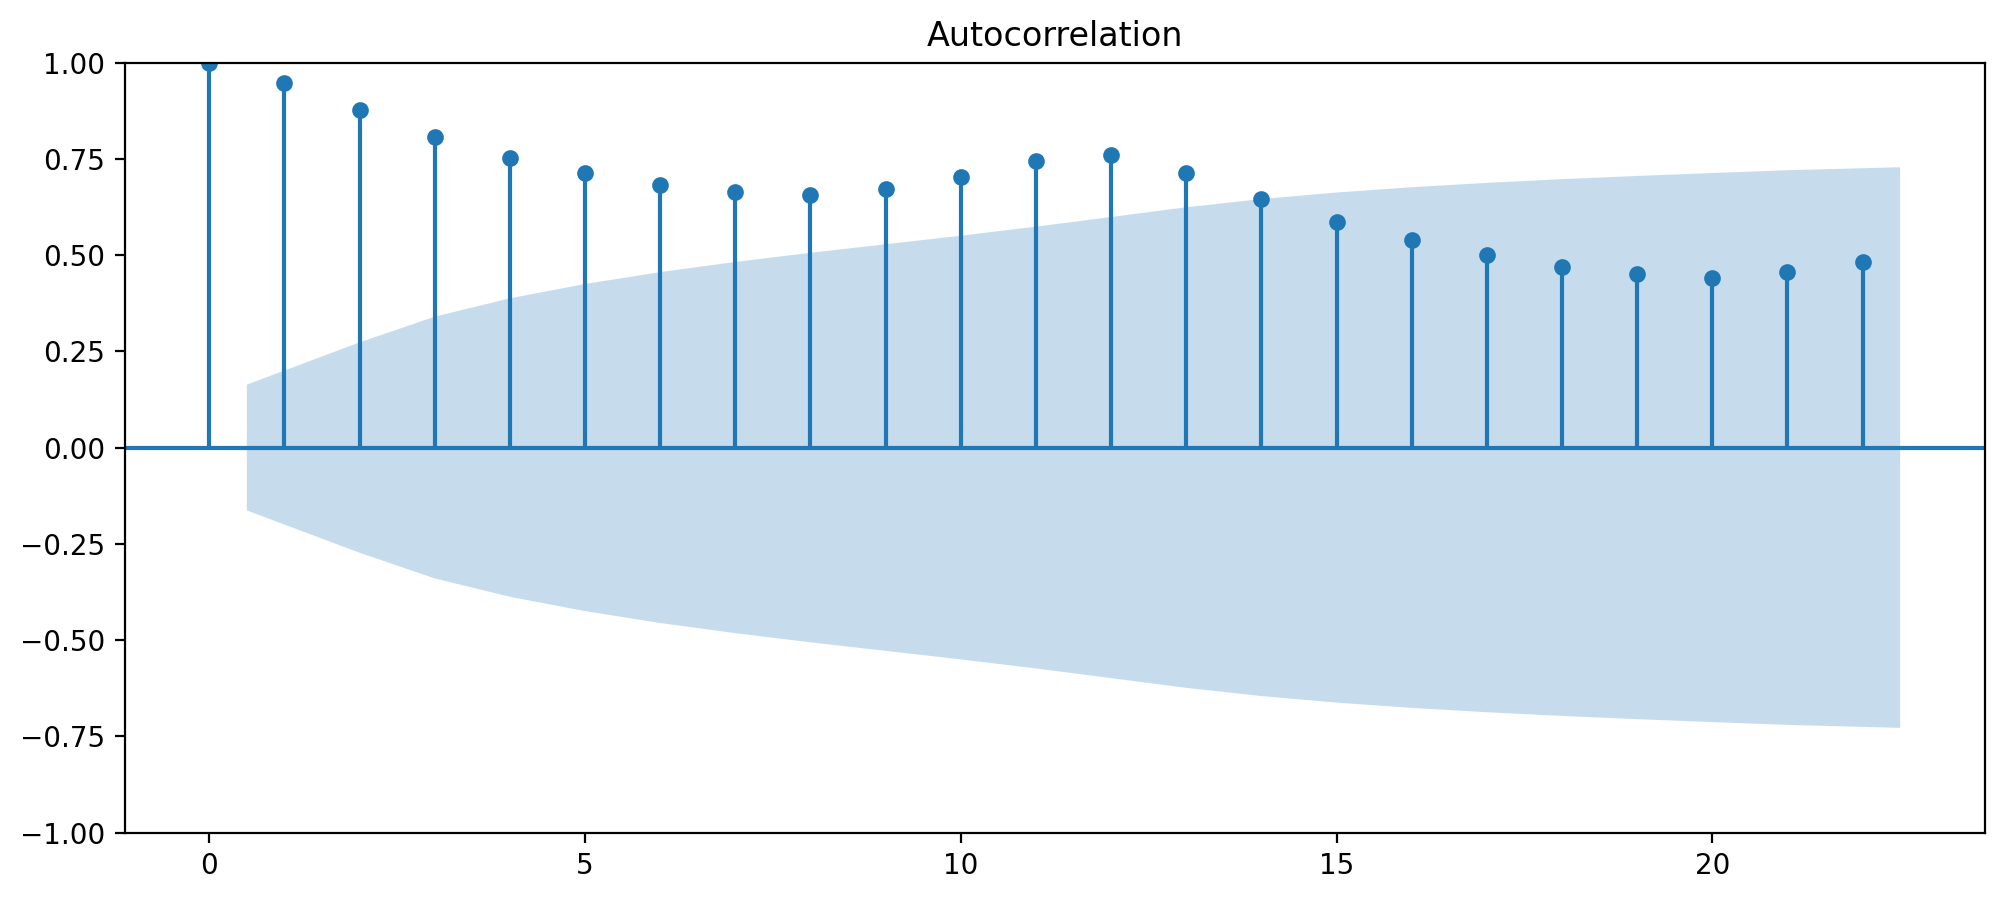

In [143]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df1['Thousands of Passengers'],ax=ax);